In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from datasets import load_dataset
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
dataset  = load_dataset("go_emotions", "simplified")

train = dataset['train'].to_pandas()
validation = dataset['validation'].to_pandas()
test = dataset['test'].to_pandas()

  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
initial_emotion_dict = {0: 'admiration',
1: 'amusement',
2: 'anger',
3: 'annoyance',
4: 'approval',
5: 'caring',
6: 'confusion',
7: 'curiosity',
8: 'desire',
9: 'disappointment',
10: 'disapproval',
11: 'disgust',
12: 'embarrassment',
13: 'excitement',
14: 'fear',
15: 'gratitude',
16: 'grief',
17: 'joy',
18: 'love',
19: 'nervousness',
20: 'optimism',
21: 'pride',
22: 'realization',
23: 'relief',
24: 'remorse',
25: 'sadness',
26: 'surprise',
27: 'neutral'}

n_labels = len(initial_emotion_dict)+1

In [4]:
subsets = train.labels.value_counts().index[0:14]
print(subsets) #returns most frequent 13 indexes + other_emotions for the rest.
kept_labels = [index[0] for index in subsets]
print(kept_labels)
kept_labels = np.array(kept_labels)

Index([[27], [0], [4], [15], [1], [3], [18], [10], [7], [2], [20], [6], [17],
       [25]],
      dtype='object')
[27, 0, 4, 15, 1, 3, 18, 10, 7, 2, 20, 6, 17, 25]


In [5]:
N_CLASSES = len(kept_labels)+1  #for other_emotions

not_kept_labels = np.arange(0,28)
not_kept_labels = np.delete(not_kept_labels, kept_labels)

def one_hot_encoder(df):
    one_hot_encoding = []
    for i in tqdm(range(len(df))):
        temp = [0]*n_labels
        label_indices = df.iloc[i]["labels"]
        for index in label_indices:
            if index in kept_labels:
              temp[index] = 1
            else:
              temp[n_labels-1] = 1 #other_emotions become 1
        temp = np.delete(temp,not_kept_labels)
        one_hot_encoding.append(temp)
    return pd.DataFrame(one_hot_encoding)

In [6]:
train_labels = one_hot_encoder(train)
valid_labels = one_hot_encoder(validation)
test_labels = one_hot_encoder(test)

100%|██████████| 5427/5427 [00:00<00:00, 12233.84it/s]


In [7]:
train = pd.concat([train, train_labels], axis=1)
valid = pd.concat([validation, valid_labels], axis=1)
test = pd.concat([test, test_labels], axis=1)

In [8]:
train.head()

,text,labels,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,My favourite food is anything I didn't have to...,[27],eebbqej,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,[14],ed7ypvh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Dirty Southern Wankers,[3],ed0bdzj,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
emotion_dict = dict()
for index,value in enumerate(np.sort(kept_labels)):
    emotion_dict[index] = initial_emotion_dict[value]
emotion_dict[len(kept_labels)] = 'other_emotions'
emotion_dict

{0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'confusion',
 6: 'curiosity',
 7: 'disapproval',
 8: 'gratitude',
 9: 'joy',
 10: 'love',
 11: 'optimism',
 12: 'sadness',
 13: 'neutral',
 14: 'other_emotions'}

In [10]:
train_shrinked = train[train.labels.isin(subsets)] #train_shrinked will be used for EDA, 
#which has most frequent 14 labels in simplified dataset + other_emotions for the rest
labels_shrinked = [initial_emotion_dict[index[0]] for index in subsets]
print(labels_shrinked)
train_shrinked.head()

['neutral', 'admiration', 'approval', 'gratitude', 'amusement', 'annoyance', 'love', 'disapproval', 'curiosity', 'anger', 'optimism', 'confusion', 'joy', 'sadness']


,text,labels,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,My favourite food is anything I didn't have to...,[27],eebbqej,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,[3],ed0bdzj,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


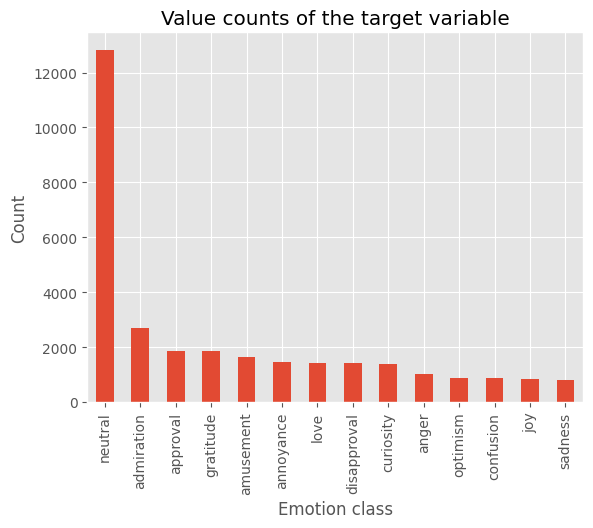

In [11]:
train_shrinked.labels.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Emotion class")
plt.xticks(ticks = np.arange(0,14), labels=labels_shrinked)
plt.ylabel("Count")
plt.show()

In [12]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
tokenizer = RegexpTokenizer(r"[\w']+")
en_stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [14]:
import re

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(words):
    word_list = []
    for word in words:
        if word not in en_stop:
            word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
            word_list.append(word)
    return word_list

#sentences first are tokenized and return a list for each and the lists will be lemmatized and returns a list of lemmatized words by using above pre_process function. 
def tokenize(df_text):
    token_list = []
    for sentences in df_text:
        sentences = re.sub('[^A-Za-z0-9 ]+', '', sentences)
        token_list.append(lemmatize(tokenizer.tokenize(sentences.lower())))
    return token_list

In [15]:
train_tokenized = tokenize(train_shrinked.text)

In [16]:
emotion_labels = [initial_emotion_dict[label[0]] for label in train_shrinked.labels]
tokenized_df = pd.DataFrame((train_tokenized,emotion_labels)).T
tokenized_df.head()

,0,1
0,"[favourite, food, anything, didnt, cook]",neutral
1,"[everyone, think, he, laugh, screw, people, in...",neutral
2,"[fuck, bayless, isoing]",anger
3,"[dirty, southern, wanker]",annoyance
4,"[yes, heard, abt, f, bomb, thanks, reply, hubb...",gratitude


In [17]:
from nltk import FreqDist

freq_dists = []

for emotion in emotion_dict:
  words = []
  sub_df = tokenized_df[tokenized_df[1] == emotion_dict[emotion]]
  for _,w_list in sub_df.iterrows():
    for w in w_list[0]:
      words.append(w) 
  freq_dists.append(FreqDist(w for w in words))

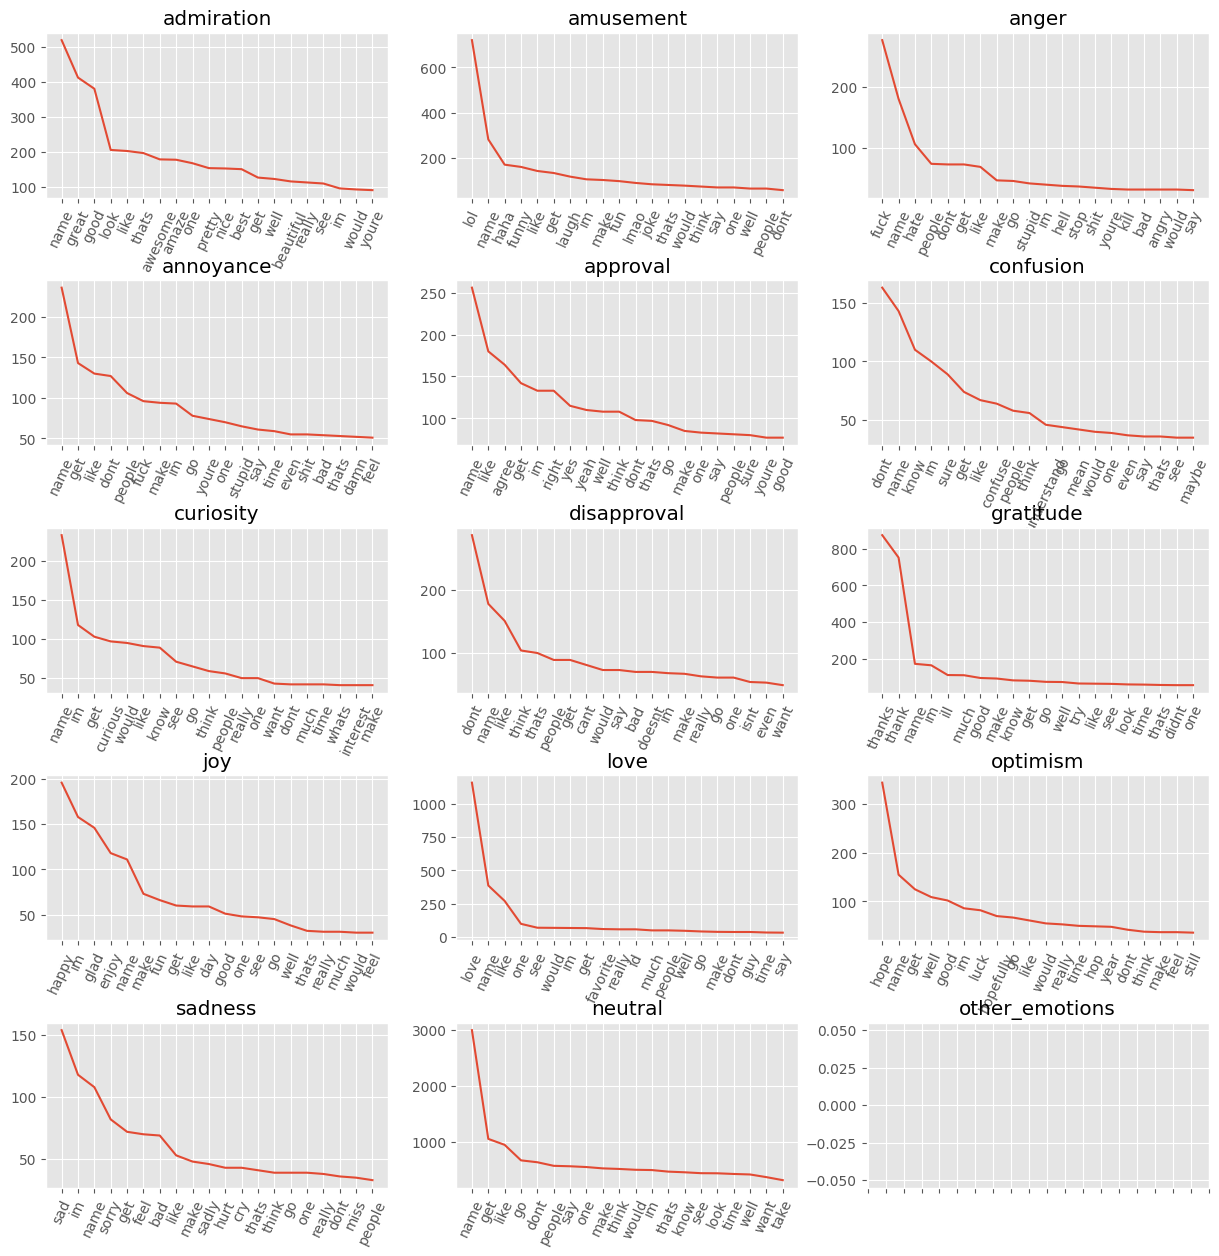

In [18]:
fig, axs = plt.subplots(5,3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)

axs = axs.ravel()

for i in range(len(freq_dists)):
    a=freq_dists[i].most_common(20)
    axs[i].plot([i[1] for i in a])
    axs[i].set_xticks(np.arange(0,20))
    axs[i].set_xticklabels([i[0] for i in a], rotation=65)
    axs[i].set_title(emotion_dict[i])